C:\Users\khusn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


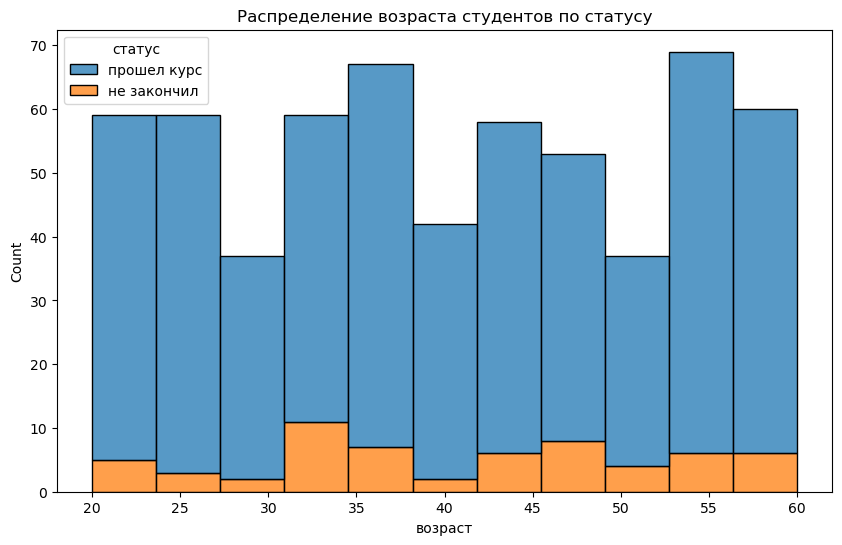

C:\Users\khusn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


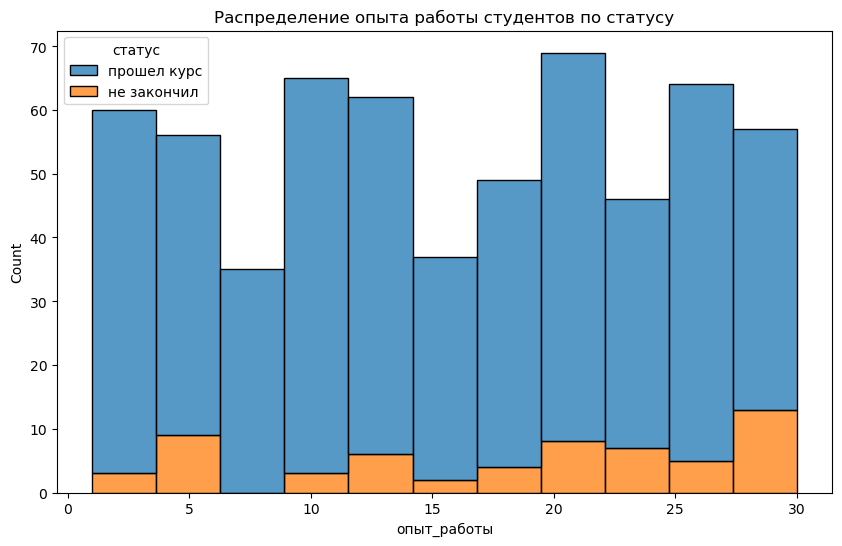

C:\Users\khusn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


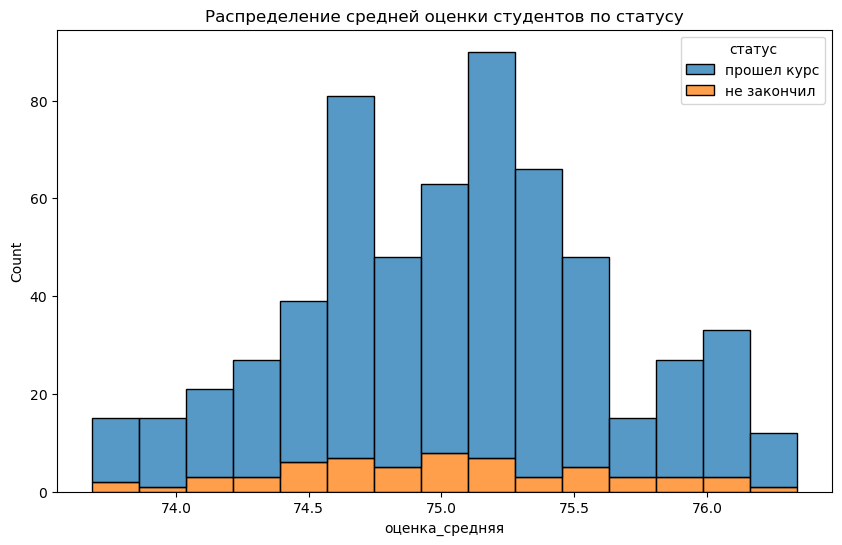

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Расчет метрик
retention_rate = merged_df['статус'].value_counts(normalize=True)['прошел курс'] * 100
average_age = merged_df['возраст'].mean()
average_experience = merged_df['опыт_работы'].mean()
average_score = merged_df['оценка_средняя'].mean()

# Визуализация
plt.figure(figsize=(10, 6))
sns.histplot(merged_df, x='возраст', hue='статус', multiple='stack')
plt.title('Распределение возраста студентов по статусу')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(merged_df, x='опыт_работы', hue='статус', multiple='stack')
plt.title('Распределение опыта работы студентов по статусу')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(merged_df, x='оценка_средняя', hue='статус', multiple='stack')
plt.title('Распределение средней оценки студентов по статусу')
plt.show()


In [14]:
import pandas as pd
import hvplot.pandas

# Create a DataFrame with dummy quality scores data
quality_scores = pd.DataFrame({
    'код_материал': ['материал_1', 'материал_2', 'материал_3', 'материал_4', 'материал_5'],
    'оценка_пользователя': [0.8, 0.6, 0.9, 0.7, 0.5],
    'оценка_тональности': [0.7, 0.8, 0.9, 0.6, 0.7],
    'время_на_материале': [0.6, 0.7, 0.8, 0.5, 0.6],
    'процент_завершения_заданий': [0.9, 0.8, 0.7, 0.6, 0.7],
    'процент_успешных_заданий': [0.5, 0.6, 0.7, 0.8, 0.6],
    'когнитивная_посильность': [0.6, 0.7, 0.8, 0.5, 0.6],
    'показатель_качества': [0.7, 0.68, 0.82, 0.68, 0.62]
})

# Set 'код_материал' as index for better plotting
quality_scores.set_index('код_материал', inplace=True)

# Visualization function
def visualize_quality_scores(quality_df):
    bar_quality = quality_df.hvplot.barh(
        y='показатель_качества',
        xlabel='Показатель качества',
        ylabel='Материал',
        title='Материал - Показатель качества',
        width=800,
        height=400,
        color='#CF78BC'
    )

    bar_characteristics = quality_df.drop(columns='показатель_качества').reset_index().melt(id_vars='код_материал').hvplot.bar(
        x='код_материал',
        y='value',
        by='variable',
        xlabel='Материал',
        ylabel='Значение',
        title='Материал - Влияние характеристик',
        width=800,
        height=400,
        color='#CF78BC'
    )

    return bar_quality, bar_characteristics

# Visualization
bar_quality, bar_characteristics = visualize_quality_scores(quality_scores)
bar_quality + bar_characteristics



:Layout
   .Bars.I  :Bars   [код_материал]   (показатель_качества)
   .Bars.II :Bars   [код_материал,variable]   (value)

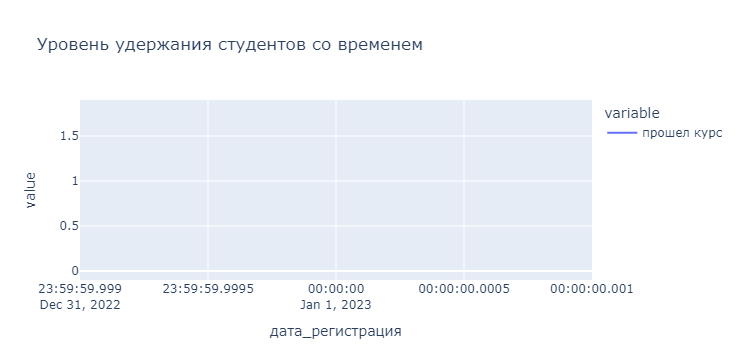

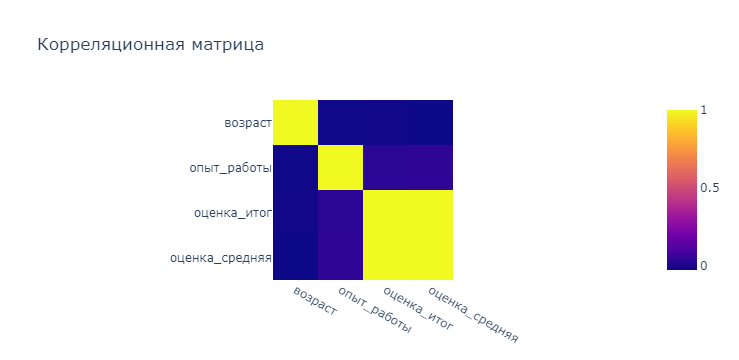

In [9]:
import plotly.express as px

# Линейный график уровня удержания
fig = px.line(merged_df.groupby('дата_регистрация')['статус'].value_counts(normalize=True).unstack().fillna(0)['прошел курс'], title='Уровень удержания студентов со временем')
fig.show()

# Корреляционный анализ
numeric_cols = merged_df.select_dtypes(include=[float, int]).columns
correlation_matrix = merged_df[numeric_cols].corr()
fig = px.imshow(correlation_matrix, title='Корреляционная матрица')
fig.show()



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      1.00      0.94       107

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120



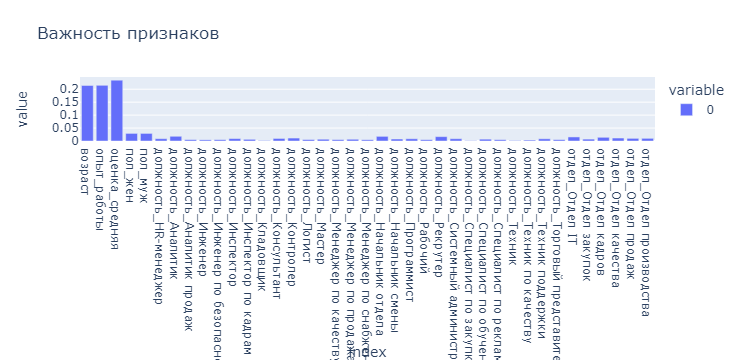

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Подготовка данных
y = (merged_df['статус'] == 'прошел курс').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Важность признаков
importances = model.feature_importances_
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importances = pd.Series(importances, index=feature_names)

fig = px.bar(feature_importances, title='Важность признаков')
fig.show()




In [20]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Анализ удержания студентов"),
    dcc.Graph(id='retention-graph'),
    dcc.Graph(id='feature-importance'),
    dcc.Dropdown(
        id='student-status-dropdown',
        options=[
            {'label': 'Все', 'value': 'all'},
            {'label': 'Прошел курс', 'value': 'passed'},
            {'label': 'Не закончил', 'value': 'not_completed'}
        ],
        value='all'
    ),
    dcc.Graph(id='histogram'),
    dcc.Graph(id='correlation-matrix')
])

@app.callback(
    [Output('retention-graph', 'figure'),
     Output('feature-importance', 'figure'),
     Output('histogram', 'figure'),
     Output('correlation-matrix', 'figure')],
    [Input('student-status-dropdown', 'value')]
)
def update_graphs(status):
    if status == 'passed':
        filtered_df = merged_df[merged_df['статус'] == 'прошел курс']
    elif status == 'not_completed':
        filtered_df = merged_df[merged_df['статус'] == 'не закончил']
    else:
        filtered_df = merged_df
    
    retention_fig = px.line(filtered_df.groupby('дата_регистрация')['статус'].value_counts(normalize=True).unstack().fillna(0)['прошел курс'], title='Уровень удержания студентов со временем')
    
    feature_importance_fig = px.bar(feature_importances, title='Важность признаков')
    
    histogram_fig = px.histogram(filtered_df, x='возраст', color='статус', title='Распределение возраста студентов по статусу')
    
    numeric_cols = filtered_df.select_dtypes(include=[float, int]).columns
    correlation_matrix = filtered_df[numeric_cols].corr()
    correlation_fig = px.imshow(correlation_matrix, title='Корреляционная матрица')
    
    return retention_fig, feature_importance_fig, histogram_fig, correlation_fig

if __name__ == '__main__':
    app.run_server(debug=True)
